95.18


(array([238.,  20.,  13.,  15.,  13.,  14.,  14.,  14.,  15.,  14.,  14.,
         13.,  14.,  14.,  14.,  13.,  14.]),
 array([  0.        ,  13.29411765,  26.58823529,  39.88235294,
         53.17647059,  66.47058824,  79.76470588,  93.05882353,
        106.35294118, 119.64705882, 132.94117647, 146.23529412,
        159.52941176, 172.82352941, 186.11764706, 199.41176471,
        212.70588235, 226.        ]),
 <a list of 17 Patch objects>)

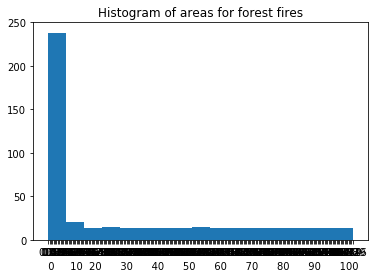

In [3]:
#1. X: x-axis spatial coordinate of the forest: 1 to 9
#2. Y: y-axis spatial coordinate of the forest: 2 to 9
#3. month: month of the year: 1 to 12 to denote "jan" to "dec"
#4. day: day of the week: 1 to 7 to denote "mon" to "sun"
#5. FFMC: FFMC index from the FWI system
#6. DMC: DMC index from the FWI system
#7. DC: DC index from the FWI system
#8. ISI: ISI index from the FWI system
#9. temp: temperature in Celsius degrees
#10. RH: relative humidity
#11. wind: wind speed in km/h
#12. rain: outside rain in mm/m2
#13. area: the burned area of the forest (this is the outcome variable)
#----------------------------------------------------------------------
#Question (a) (1 point) Data exploration: Plot a histogram of the outcome variable (column 13). What do you observe?

import pandas as pd
import matplotlib.pyplot as plt

forest_fire_data = pd.read_csv("hw3_question1.csv", header=None, names = ['X', 
                                                                          'Y',
                                                                          'month',
                                                                          'day',
                                                                          'FFMC',
                                                                          'DMC',
                                                                          'DC',
                                                                          'ISI',
                                                                          'temp',
                                                                          'RH',
                                                                          'wind',
                                                                          'rain',
                                                                          'area'])
new_header = forest_fire_data.iloc[0] #grab the first row for the header
forest_fire_data = forest_fire_data[1:] #take the data less the header row
forest_fire_data.columns = new_header #set the header row as the df header
#print(forest_fire_data)

#print(forest_fire_data['area'])
hist_area_list = []
for x in forest_fire_data['area']:
    hist_area_list.append(x)
    
#hist_area = forest_fire_data.hist(column='area')
#forest_fire_data['area'].hist() 
"""ask about this one"""

#plt.hist(forest_fire_data['area'], bins=20)  

plt.title('Histogram of areas for forest fires')
#fix thick black line issue, realized they were all the numbers crunched up
plt.xlabel('  0     10  20      30      40      50      60      70      80      90      100')#portray true area values
print(max(hist_area_list))#the maximum possible value in the dataset, arrange the range in line above
plt.hist(hist_area_list, bins=17)

In [ ]:
#plt.title('Histogram of outcomes for affected areas for forest fires')
#affected_areas_df = forest_fire_data.loc[forest_fire_data['area'] == '0']
#plt.hist(affected_areas_df, bins = 20)

In [167]:
'''question 1b)'''#----------------------------------------------------------------------
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from statistics import mean 

affected_areas_df = forest_fire_data.loc[forest_fire_data['area'] == '0']
#prints dataframe of affected areas in data
non_affected_areas_df = forest_fire_data.loc[forest_fire_data['area'] != '0'] 
#prints dataframe of non-affected areas in data

#10-fold cross validation for part b still

X_train = forest_fire_data.iloc[:, 0:12] #dataset without outcome
Y_train = forest_fire_data['area'] #dataset that's just the outcome

#Shuffle the dataset randomly.
forest_fire_data.sample(frac=1)

#Split the dataset into k groups, k = 10
X_train_1 = X_train.iloc[1:46] 
Y_train_1 = Y_train.iloc[1:46]

X_train_2 = X_train.iloc[47:92]
Y_train_2 = Y_train.iloc[47:92]

X_train_3 = X_train.iloc[93:138]
Y_train_3 = Y_train.iloc[93:138]

X_train_4 = X_train.iloc[139:184]
Y_train_4 = Y_train.iloc[139:184]

X_train_5 = X_train.iloc[185:230]
Y_train_5 = Y_train.iloc[185:230]

X_train_6 = X_train.iloc[231:276]
Y_train_6 = Y_train.iloc[231:276]

X_train_7 = X_train.iloc[277:322]
Y_train_7 = Y_train.iloc[277:322]

X_train_8 = X_train.iloc[323:368]
Y_train_8 = Y_train.iloc[323:368]

X_train_9 = X_train.iloc[369:414]
Y_train_9 = Y_train.iloc[369:414]

X_train_10 = X_train.iloc[415:460]
Y_train_10 = Y_train.iloc[415:460]

list_X = [X_train_1, X_train_2, X_train_3, X_train_4, X_train_5, X_train_6, X_train_7, X_train_8, X_train_9, X_train_10]
list_Y = [Y_train_1, Y_train_2, Y_train_3, Y_train_4, Y_train_5, Y_train_6, Y_train_7, Y_train_8, Y_train_9, Y_train_10]

cross_valid_accuracies = []
E = [] #vector to store accuracies in

#For each unique group: 
for x in range(10):#Take the group as a hold out or test data set
    X_test_s = random.choice(list_X)
    Y_test_s = random.choice(list_Y)

    #Take the remaining groups as a training data set
    X_train_s = X_train.drop(X_test_s.index)
    #print(train_dataset.shape)
    
    #Fit a model on the training set and evaluate it on the test set
  
    #logmodel = LogisticRegression()
    #logmodel.fit(X_train,Y_train)
    #predictions = logmodel.predict(X_test_s)

    #print(classification_report(Y_test_s,predictions))
    
    logreg = LogisticRegression()
    logreg.fit(X_train, Y_train)
    
    y_pred = logreg.predict(X_test_s)
    #print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_s, Y_test_s)))
    
    cross_valid_accuracies.append(logreg.score(X_test_s, Y_test_s))
    
    #Retain the evaluation score
print('Accuracies of logistic regression classifier on test set:')
for x in cross_valid_accuracies:
    print(str(round(x, 2)))
print('Average Accuracy of logistic regression classifier on test set:')
print(str(round(mean(cross_valid_accuracies), 2)))
    #Summarize the skill of the model using the sample of model evaluation scores

C:\Users\Esther Joseph\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Esther Joseph\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Esther Joseph\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Esther Joseph\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Esther Joseph\Anaconda3\lib\site-packages\sklearn\linear_model\lo

Accuracies of logistic regression classifier on test set:
0.36
0.51
0.6
0.29
0.69
0.27
0.6
0.56
0.87
0.51
Average Accuracy of logistic regression classifier on test set:
0.52


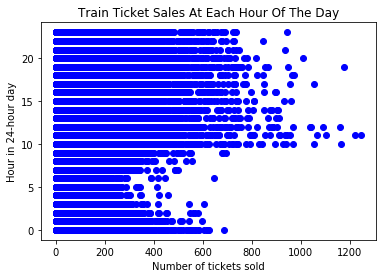

In [165]:
#Maximum Likelihood Estimation: The goal of this problem is to model the number of
#tickets sold in a train station between August 25th, 2012 to September 25th, 2014.
#Inside \Homework 3" folder on Piazza you can find the file including the corresponding data
#(named \hw3 question2.csv"). Column 1 refers to the day/time of the year, and Column 2
#refers to the number of tickets sold during that corresponding hour. The file includes around
#18K columns, which correspond to the hours of the data.

'''Question 2 (i)'''# (0.5 points) Data exploration: Plot the number of tickets sold over these two years. The
#x-axis should represent the hours elapsed since August 25th, 2012. The y-axis should represent
#the number of tickets sold over each hour. What do you observe?
import matplotlib.pyplot as plt

train_ticket_data = pd.read_csv("hw3_question2.csv", header=None)
new_header = train_ticket_data.iloc[0] #grab the first row for the header
train_ticket_data = train_ticket_data[1:] #take the data less the header row
train_ticket_data.columns = new_header #set the header row as the df header

train_ticket_data['Datetime'] = pd.to_datetime(train_ticket_data['Datetime'])
train_ticket_data = train_ticket_data.set_index('Datetime')
train_ticket_data['day'] = train_ticket_data.index.date
train_ticket_data['time'] = train_ticket_data.index.time
train_ticket_data['hours'] = train_ticket_data.index.hour

hours_list = []
for ele in train_ticket_data['hours']:
    hours_list.append(int(ele))

count_list = []
for ele_y in train_ticket_data['Count']:
    count_list.append(int(ele_y))

plt.scatter(count_list,hours_list,color='blue')# from 0 to 24 on the x-axis represents the 24 hour time
plt.title('Train Ticket Sales At Each Hour Of The Day')
plt.xlabel('Number of tickets sold')
plt.ylabel('Hour in 24-hour day')
plt.show()

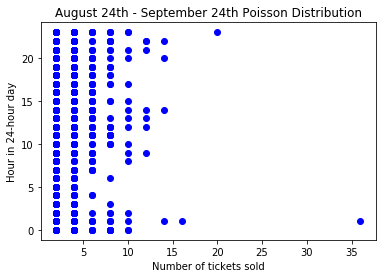

Value for lambda for the poisson distribution from Aug 24th to Sept 24th for number of tickets per hour:
3.79


In [172]:
'''Question 2(ii.a)'''# Statistical model of first month of data: For this question we will only consider the
#data that correspond to the first month of the study (i.e., August 25th, 2012 to September
#24th, 2012). Let {x1; : : : ; x_N} be the number of hourly tickets of the first month, where in our case N = 744.

import matplotlib.pyplot as plt

train_ticket_data = pd.read_csv("hw3_question2.csv", header=None)
new_header = train_ticket_data.iloc[0] #grab the first row for the header
train_ticket_data = train_ticket_data[1:] #take the data less the header row
train_ticket_data.columns = new_header #set the header row as the df header

train_ticket_data['Datetime'] = pd.to_datetime(train_ticket_data['Datetime'])
train_ticket_data = train_ticket_data.set_index('Datetime')
train_ticket_data['hours'] = train_ticket_data.index.hour

hours_list = []
for ele in train_ticket_data['hours'].iloc[0:744]: #cutting off # of data samples at 744 == Aug 24th - Sept 24th
    hours_list.append(int(ele))

count_list = []
for ele_y in train_ticket_data['Count'].iloc[0:744]:
    count_list.append(int(ele_y))

plt.scatter(count_list,hours_list,color='blue')# from 0 to 24 on the x-axis represents the 24 hour time
plt.title('August 24th - September 24th Poisson Distribution')
plt.xlabel('Number of tickets sold')
plt.ylabel('Hour in 24-hour day')
plt.show()


'''Question 2(ii.b-d) on separate paper provided'''

'''Question 2(ii.e)'''# (0.5 points) Based on the above mathematical expression, find the maximum likelihood
#estimation of lambda from the given data {x1; : : : ; x_N}.

#sum of data samples as sum of n=1...N for x_N
summation_of_xN = sum(count_list)
#acting as the value for N, as lambda = sum of n=1...N for x_N / N
N = 744 #since this is taking the range from Aug 24th to Sept 24th

lambda_poisson =  summation_of_xN / N
print("Value for lambda for the poisson distribution from Aug 24th to Sept 24th for number of tickets per hour:")
print(round(lambda_poisson,2))